# Introduction to Data Science
## Homework 2

Student Name: Roshan Kumar

Student Netid: rk3110
***

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
import random

# Code here
# 1.1 load data
# Use double slash with U to indicate start of avoid the effect of \U which is interpreted as a special Unicode character.
data = pd.read_csv('C:\\Users\kumar\OneDrive\Documents\GitHub\DS-GA-1001-IntroToDataScience\Assignments\hw2\data\cell2cell_data.csv')

# 1.2 Split the data in train and test datasets
def split_data(data,percent):
    # get list of indices for training data randomly\
    # random.sample(given_list,k) randomly samples a list of length k from given_list
    train_indices = random.sample(range(0,len(data)), int(percent*len(data)))
    test_indices  = list(set(range(0,len(data))) - set(train_indices))
    # Use .ix instead of .iloc or .loc for accessing though both works(http://pandas.pydata.org/pandas-docs/stable/indexing.html)
    return data.ix[train_indices],data.ix[test_indices]

# split the data
train_df,test_df = split_data(data,0.8000)

print(train_df.describe().transpose())
print(test_df.describe().transpose())

            count        mean         std   min     25%    50%      75%  \
revenue   31887.0   58.488041   43.828514 -5.86   33.25   48.3   70.735   
outcalls  31887.0   24.870265   34.934648  0.00    3.00   13.0   33.000   
incalls   31887.0    8.003254   16.829148  0.00    0.00    2.0    8.670   
months    31887.0   18.789758    9.583002  6.00   11.00   17.0   24.000   
eqpdays   31887.0  392.960203  256.931238 -5.00  212.00  342.0  532.000   
webcap    31887.0    0.894973    0.306593  0.00    1.00    1.0    1.000   
marryyes  31887.0    0.367109    0.482024  0.00    0.00    0.0    1.000   
travel    31887.0    0.056732    0.231333  0.00    0.00    0.0    0.000   
pcown     31887.0    0.187130    0.390022  0.00    0.00    0.0    0.000   
creditcd  31887.0    0.675981    0.468015  0.00    0.00    1.0    1.000   
retcalls  31887.0    0.043999    0.224095  0.00    0.00    0.0    0.000   
churndep  31887.0    0.500361    0.500008  0.00    0.00    1.0    1.000   

              max  
reve

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

We need to show that there is no selection bias in the sample.By definition, a sample of size n is random if the probability of selecting the sample is the same as the probability of selecting every other sample of size n. We can have a system to compute both these probabilities from our sampled data. If both turns out to be same we have no sampling bias and the data is indeed random. Else there is a sampling bias and the our sample is not random.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [2]:
from sklearn import tree

# Code here
features = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls']
target = ['churndep']
X_train = train_df[features]
y_train = train_df[target]

# Specify tree specifications
clf = tree.DecisionTreeClassifier(criterion='entropy')
# Build the tree
clf = clf.fit(X_train,y_train) # need to figure out the X and Y


4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

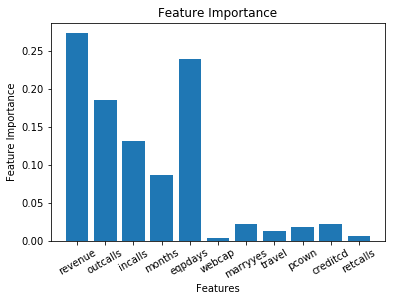

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Code here
x = range(len(features))
y = clf.feature_importances_

plt.bar(x,y)
# xticks:
# first arg - positions on x-axis that will be marked
# second arg - Label for the marked points on x-axis
# rotation - labels will appear rotated to avoid cluttering
plt.xticks(range(len(features)),features,rotation=30)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [4]:
# Code/answer here
# Three most important features are - revenue, eqpdays and outcalls
# The relationship between these 3 features and churn outcome can be interpreted using correlation between these variables and 
# churndep
train_df[['revenue','eqpdays','outcalls','churndep']].corr()


,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.223662,0.500320,-0.009498
eqpdays,-0.223662,1.000000,-0.240822,0.114794
outcalls,0.500320,-0.240822,1.000000,-0.032650
churndep,-0.009498,0.114794,-0.032650,1.000000


We can conclude that the revenue and outcalls negatively drive the churn since they are negatively correlated.In real-life it means that person who is making a lot of outcalls or is generating a lot of revenue is less likely to churn(leave the company).On the otherhand eqpdays positively drives the churn since they are positively correlated. It means that the person who has used his equipment for long time(high eqpdays) has higher chances of churning(leaving the company).

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [5]:
# Code here
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
print("Predictions on training data: ", clf.predict(X_train))
print("Accuracy on training data: ", clf.score(X_train,y_train))
print("Predictions on test data: ",clf.predict(X_test))
print("Accuracy on test data: ",clf.score(X_test,y_test))

Predictions on training data:  [1 1 0 ..., 1 1 1]
Accuracy on training data:  0.99987455703
Predictions on test data:  [0 0 1 ..., 1 0 1]
Accuracy on test data:  0.530858003011


### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [6]:
# Code here
#????? What values to try ?????

min_samples_split_values = np.logspace(1,13,num=10,base=2)
min_samples_leaf_values = np.logspace(1,13,num=10,base=2)
#min_samples_split_values = np.linspace(4,5000,num=10)
#min_samples_leaf_values = np.linspace(4,5000,num=10)

2\. Explain in words your reasoning for choosing the above ranges.

We need to try out large range of values to see where exactly do we get the best performance. We can also try out with more values of these parameters to do a more extensive search. 10 points on logscale enalbes us to test a wide range of values. Also height of a tree is logarithmic so trying out different log values enables us to try different kinds of trees.
Once we figure out regions of best perfomance, we can further finetune these parameters by zooming in on the good region.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

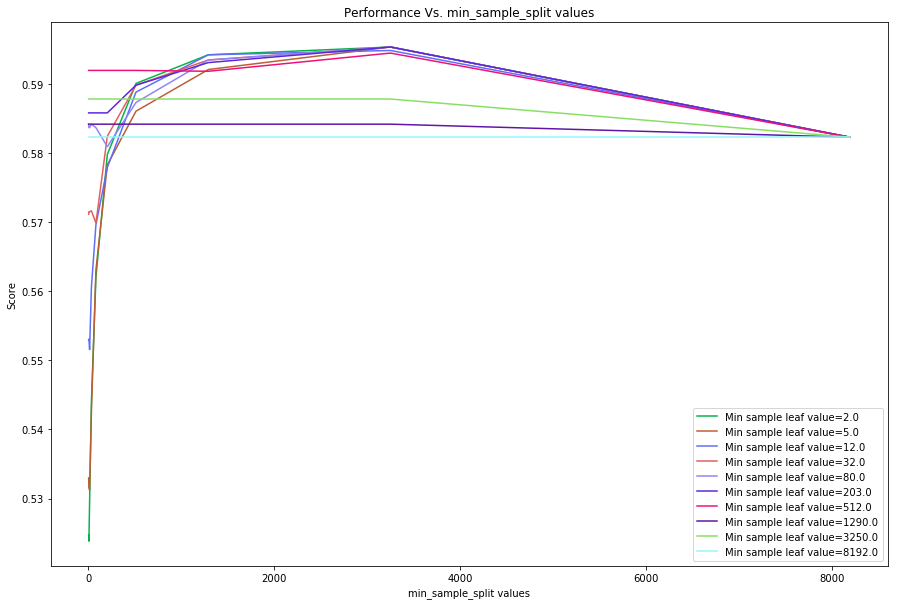

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Code here
fig = plt.figure(figsize=(15,10))
plt.xlabel('min_sample_split values')
plt.ylabel('Score')
plt.title('Performance Vs. min_sample_split values')

def serachParams():
    min_leaf=0.0
    min_split =0.0
    best_score =0.0
    for leaf in min_samples_leaf_values:
        test_scores = list()
        for split in min_samples_split_values:
            clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=int(leaf), min_samples_split=int(split))
            clf.fit(X_train,y_train)
            score = clf.score(X_test,y_test)
            if (score>best_score):
                best_score=score
                min_leaf = leaf
                min_split = split
            test_scores.append(score)
        plt.plot(min_samples_split_values, test_scores,color=(np.random.rand(),np.random.rand(),np.random.rand()),
                 label='Min sample leaf value={}'.format(np.floor(leaf)))
    return min_leaf,min_split,best_score

# Plot the test score
(min_leaf,min_split,best_score)=serachParams()
plt.legend(loc='lower right')
plt.show()



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [8]:
# Code here
print("Best leaf value: ",min_leaf)
print("Best split value: ",min_split)
print("Best Score: ", best_score)


Best leaf value:  2.0
Best split value:  3250.99735443
Best Score:  0.595333667837


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Churn predcition can be used to avoid churn in many ways. Churning customers causes loss of revenue to the company and bad reviews on social media which is bad for business.The company can use churn model in following ways to its benefit:
1. Lure the customers that are predicted by the model to be highly likely to churn(leave the company) by giving them special incentives and redressing their problems, if any, proactively.
2. As was seen above customers who have used their equipment for long are likely to churn. Hence they can be provided with some added benefits so that they continue.
3. It can be used to modify company policies so that root causes of churn are addressed